# Fraud Detection in Insurance

In [8]:
# Import pandas 
import pandas as pd 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [10]:
# Load the data set, as first column is index coulumn use index_col=0 
data=pd.read_csv('Simple insurance_fraud.csv',index_col=0) 

In [11]:
# let's obtains the insights of the data
data.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,0,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,0,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,2,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,0,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,0,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 11797
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            358 non-null    object 
 1   State             358 non-null    object 
 2   Area              358 non-null    object 
 3   City              358 non-null    object 
 4   Consumer_profile  358 non-null    object 
 5   Product_category  358 non-null    object 
 6   Product_type      358 non-null    object 
 7   AC_1001_Issue     358 non-null    int64  
 8   AC_1002_Issue     358 non-null    int64  
 9   AC_1003_Issue     358 non-null    int64  
 10  TV_2001_Issue     358 non-null    int64  
 11  TV_2002_Issue     358 non-null    int64  
 12  TV_2003_Issue     358 non-null    int64  
 13  Claim_Value       358 non-null    float64
 14  Service_Centre    358 non-null    int64  
 15  Product_Age       358 non-null    int64  
 16  Purchased_from    358 non-null    object 


In [14]:
# Data consists of 19 columns/features and 358 rows/touples with zero null values 
# so no need to perform data imputation
# target column is "Fraud" 0 indicates non fraud and 1 indicates fraud
# Data consists of catagories and numerical value, so first find out number of unique elements in the features.

In [15]:
d={}
for i in data.columns:
    if data[str(i)].dtype == 'O':
        d[str(i)]=[data[str(i)].nunique(),data[str(i)].unique()]
    else:
        d[str(i)]= "Numerical"
    

In [16]:
d

{'Region': [8,
  array(['South', 'North', 'North East', 'North West', 'South East',
         'South West', 'West', 'East'], dtype=object)],
 'State': [20,
  array(['Karnataka', 'Haryana', 'Tamil Nadu', 'Jharkhand', 'Kerala',
         'Andhra Pradesh', 'Bihar', 'Gujarat', 'Delhi', 'Maharashtra',
         'West Bengal', 'Goa', 'Jammu and Kashmir', 'Assam', 'Rajasthan',
         'Madhya Pradesh', 'Uttar Pradesh', 'Tripura', 'Himachal Pradesh',
         'Orissa'], dtype=object)],
 'Area': [2, array(['Urban', 'Rural'], dtype=object)],
 'City': [27,
  array(['Bangalore', 'Chandigarh', 'Chennai', 'Ranchi', 'Kochi',
         'Hyderabad', 'Patna', 'Purnea', 'Vadodara', 'New Delhi', 'Mumbai',
         'Ahmedabad', 'Pune', 'Kolkata', 'Vizag', 'Panaji', 'Srinagar',
         'Guwhati', 'Jaipur', 'Bhopal', 'Meerut', 'Delhi', 'Agartala',
         'Shimla', 'Bhubaneswar', 'Vijayawada', 'Lucknow'], dtype=object)],
 'Consumer_profile': [2, array(['Business', 'Personal'], dtype=object)],
 'Product_catego

## DATA visualization

In [17]:
# lets find out the correlation between the features


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/abhyudaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


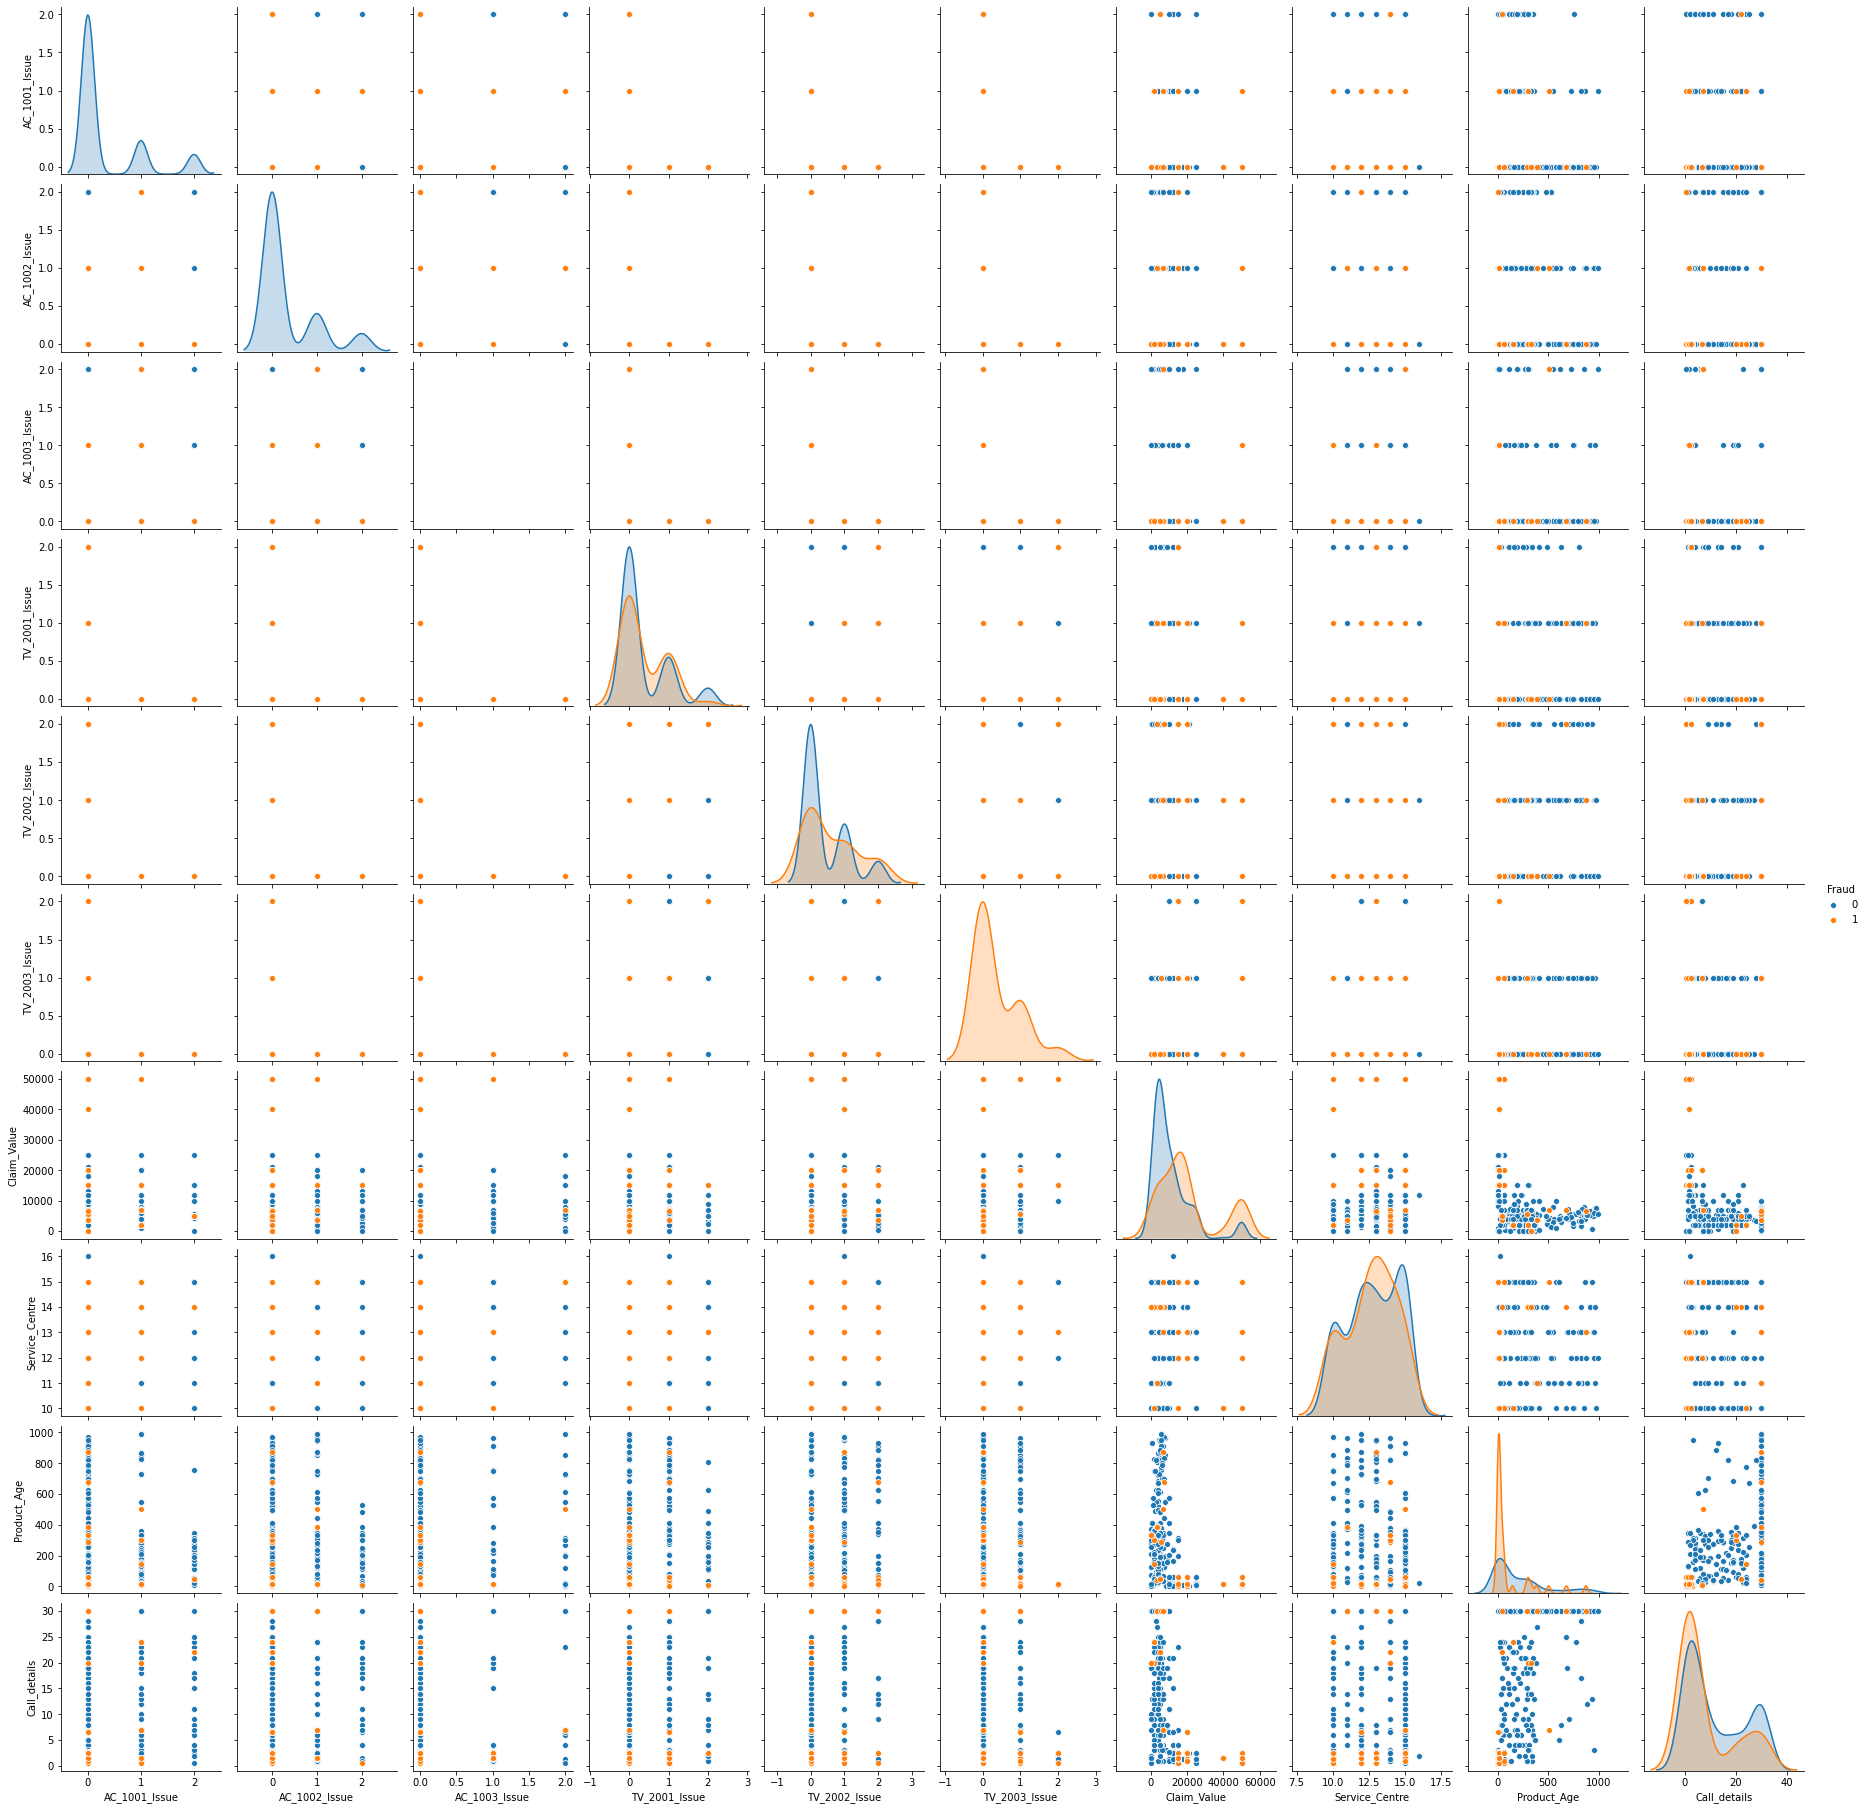

In [19]:
sns.pairplot(data,hue='Fraud')

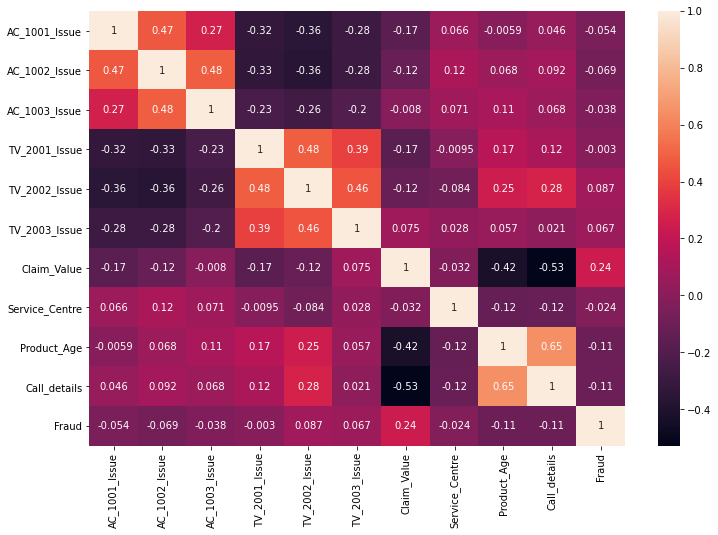

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [21]:
# We can conclude that, there is no as such correlation between the features so we will keep all the features
# for our analysis

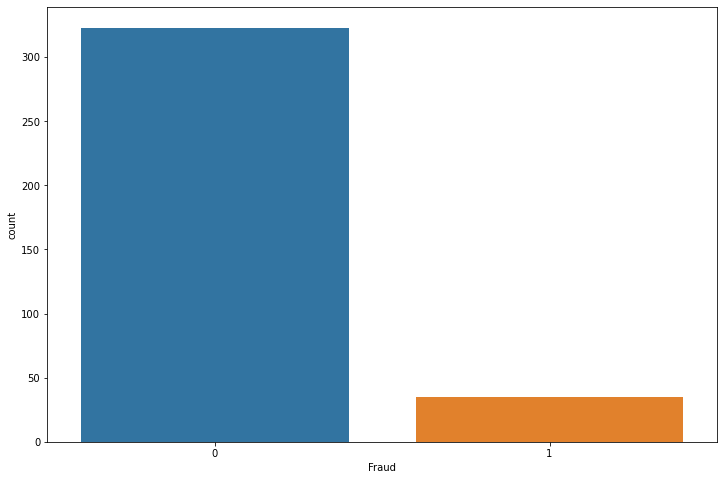

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='Fraud',data=data)

In [23]:
# we can see that data is baised/ imbalanced i.e. number of class '0' are higher than the number of class'1',
# so here we need to perform data balancing
# lets find out the exact numbers

In [24]:
data['Fraud'].value_counts()

0    323
1     35
Name: Fraud, dtype: int64

In [25]:
data['Service_Centre'].nunique()

7

In [26]:
# out of 358, class'0's are 323 and class'1's are 35
# Training with such data may lead to get an accuracy paradox
# i.e 323/358= 90% so anyhow we will get the accuracy of 90% 

In [27]:
# lets plot some graphs for catagorical features

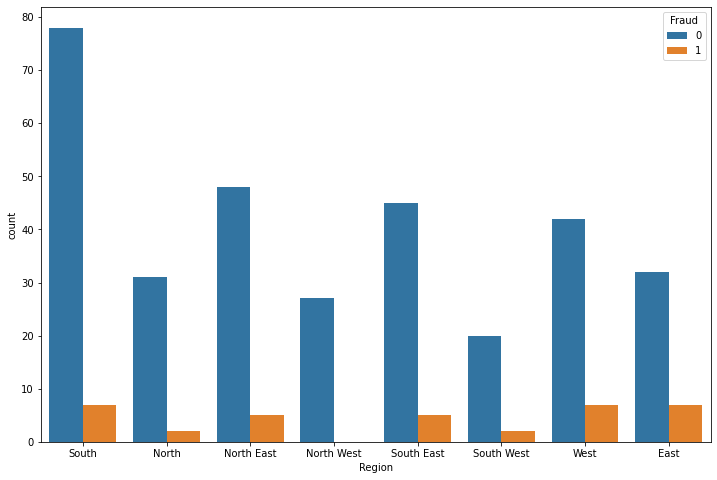

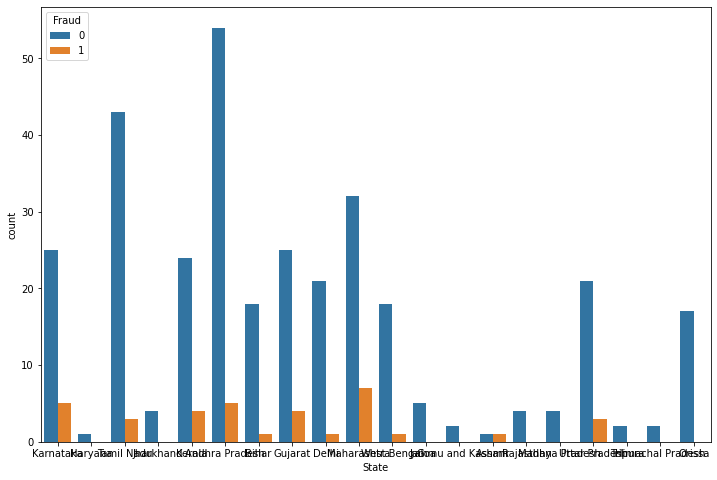

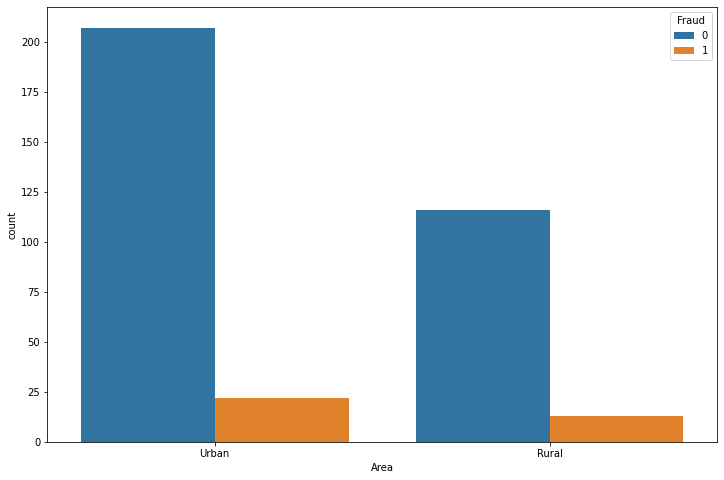

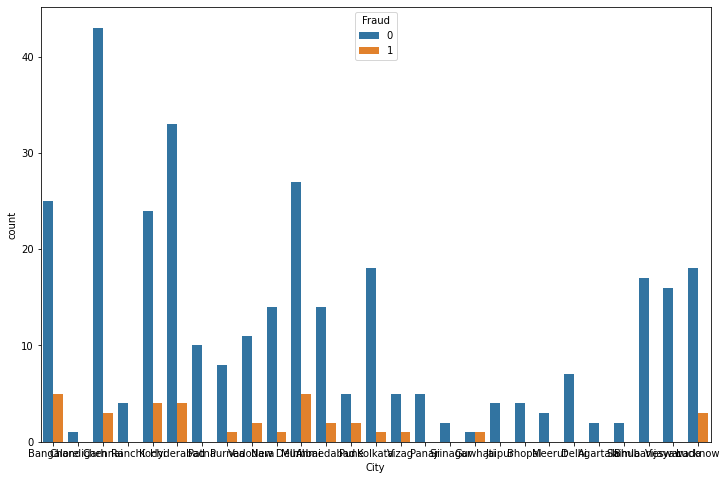

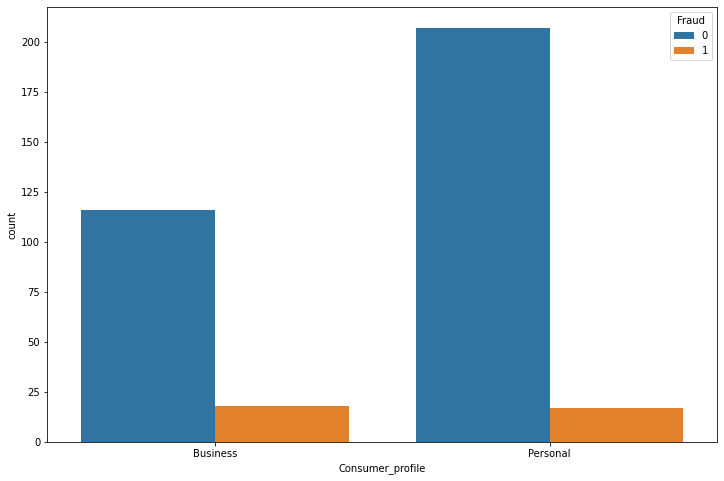

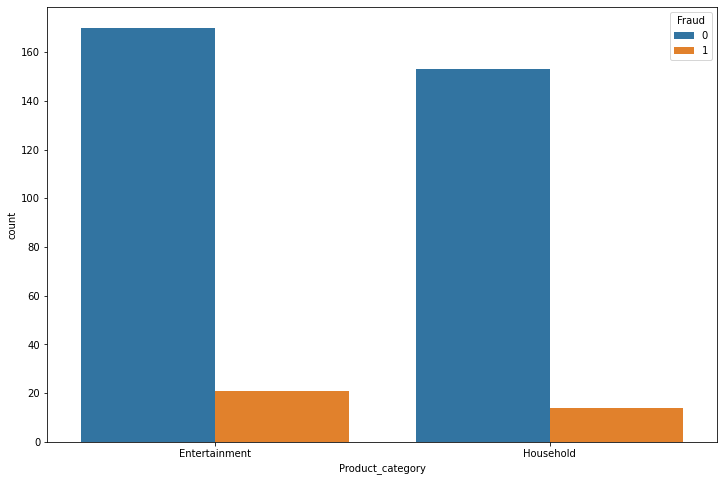

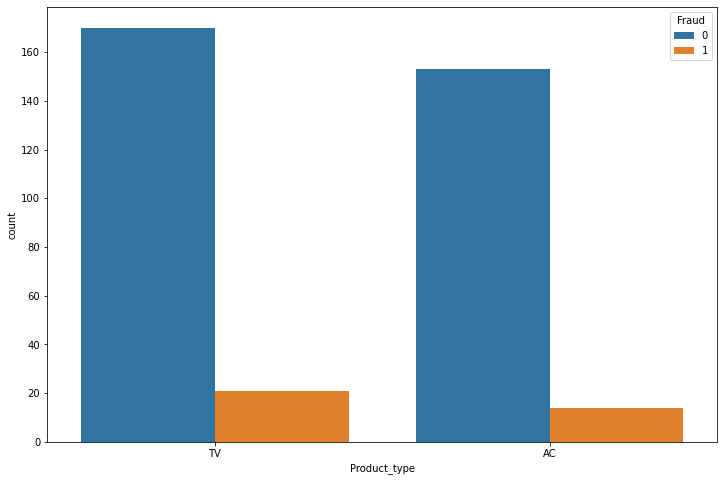

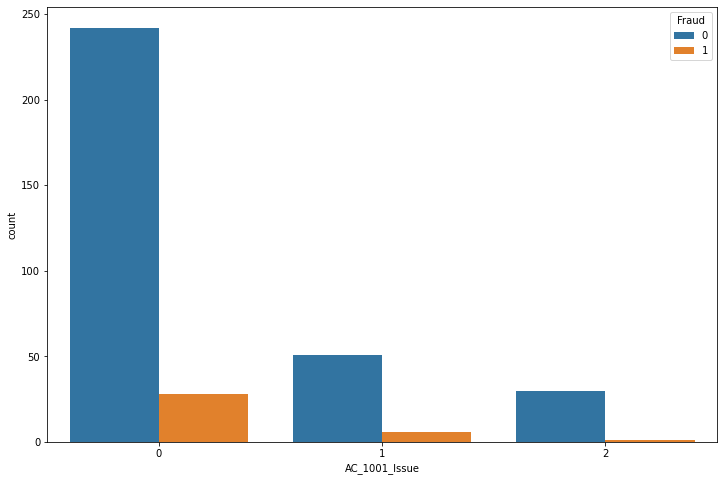

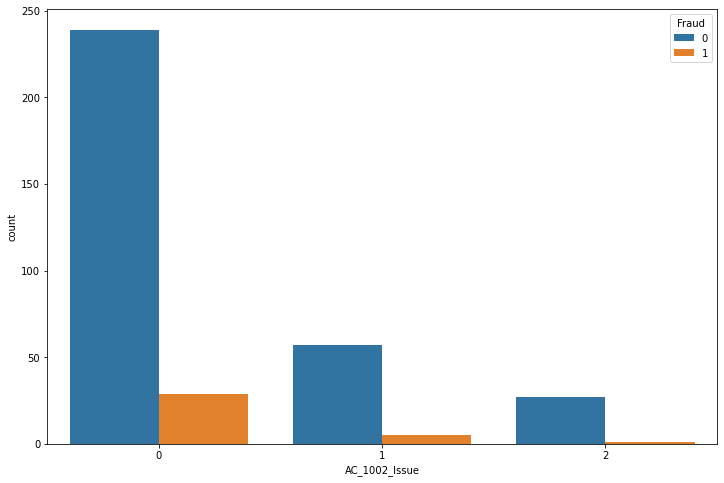

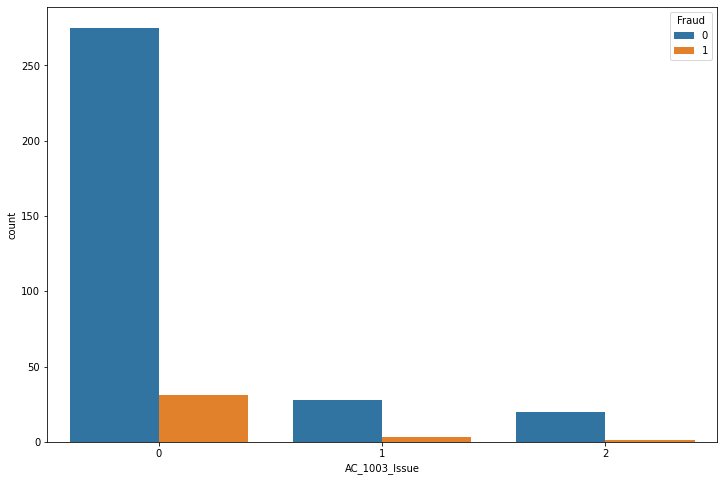

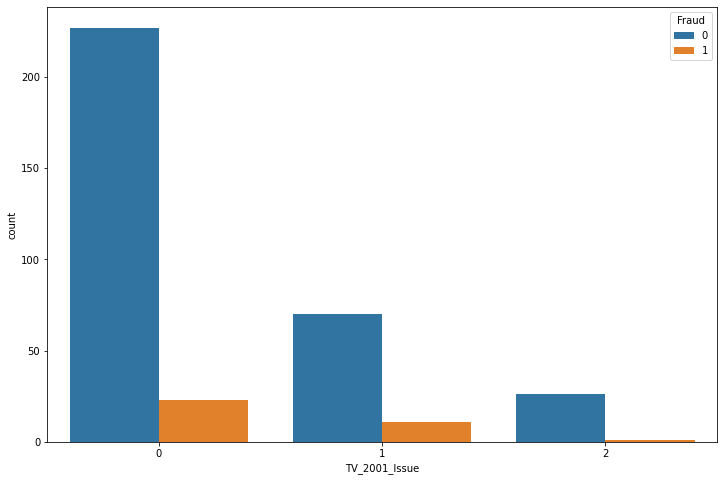

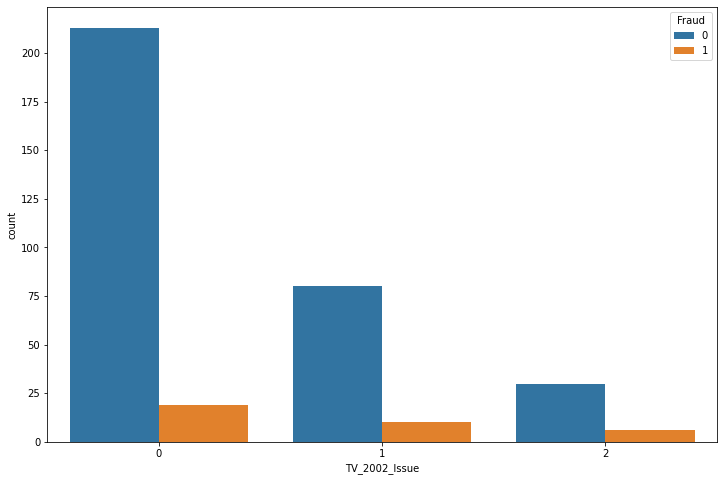

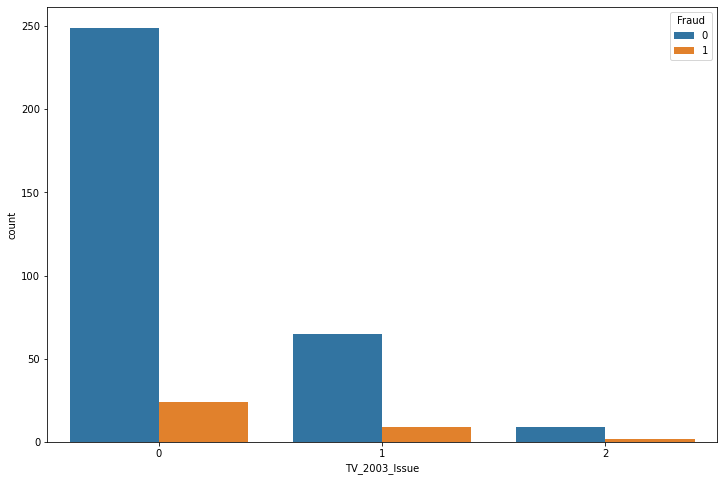

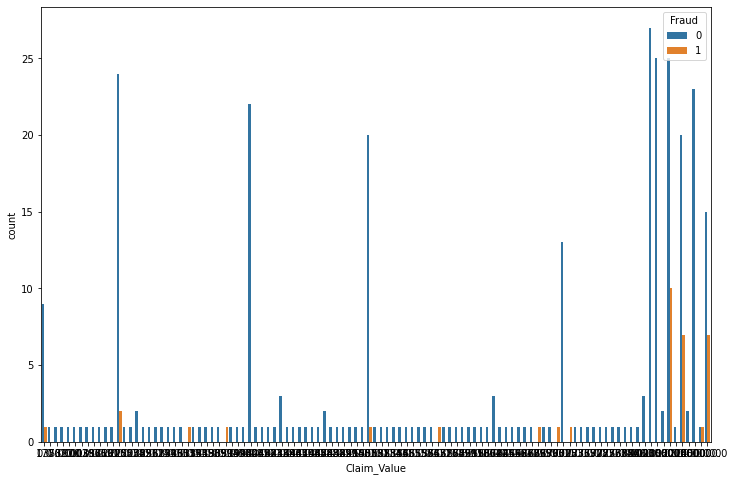

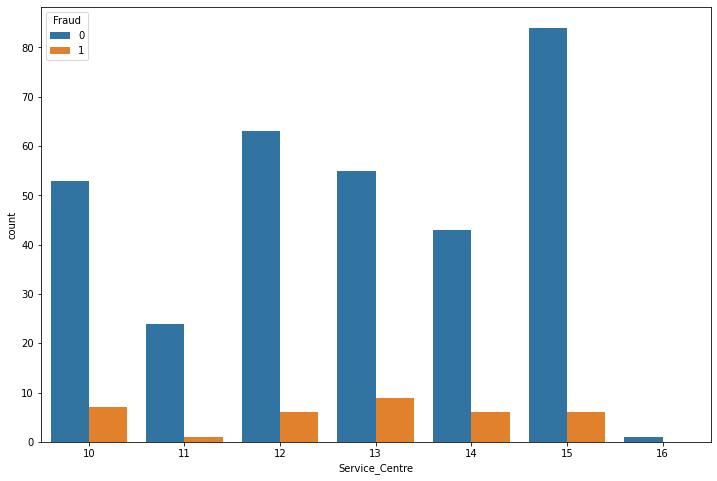

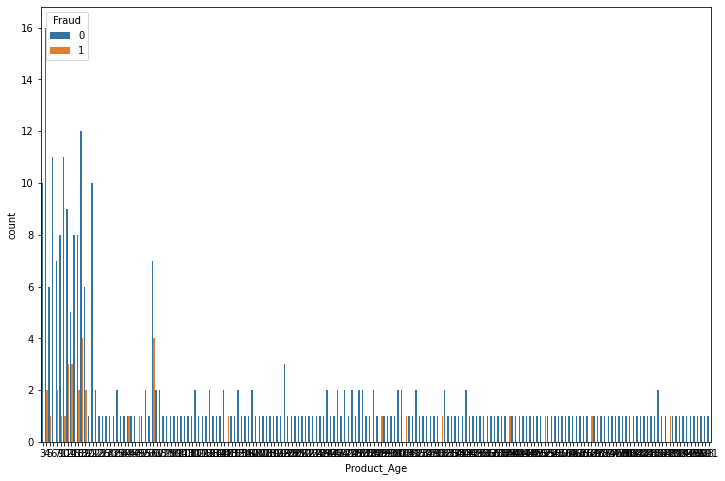

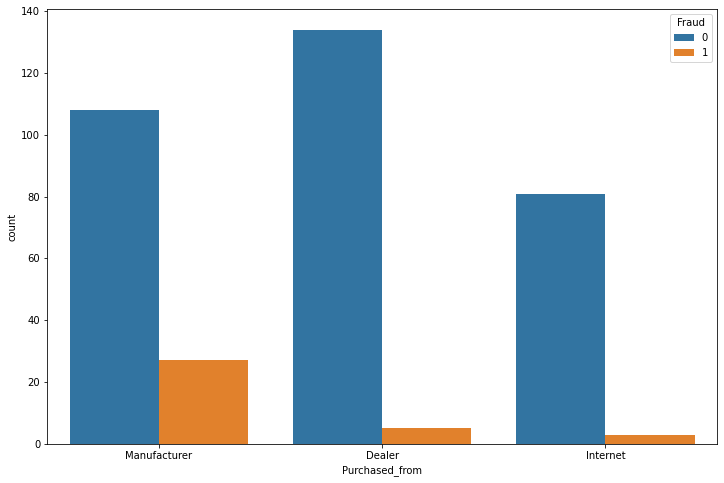

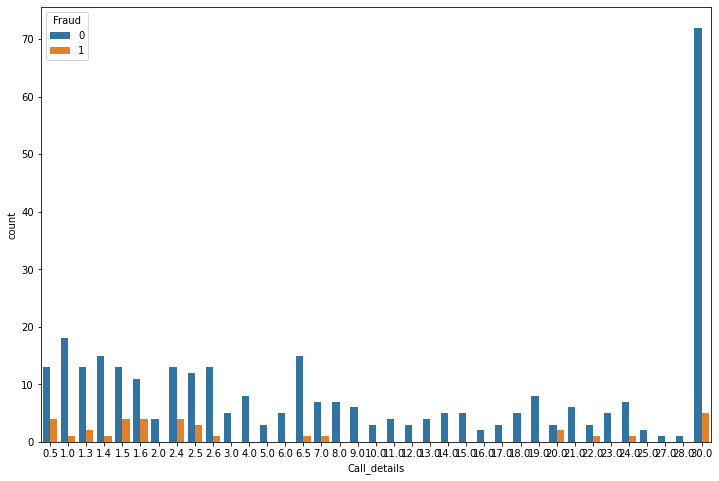

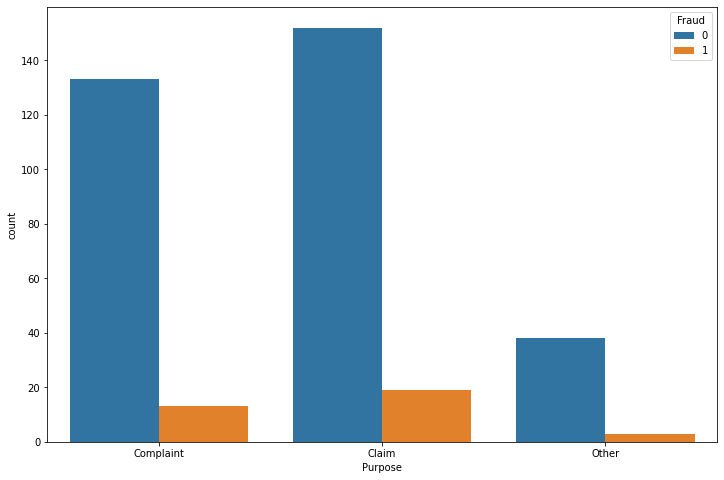

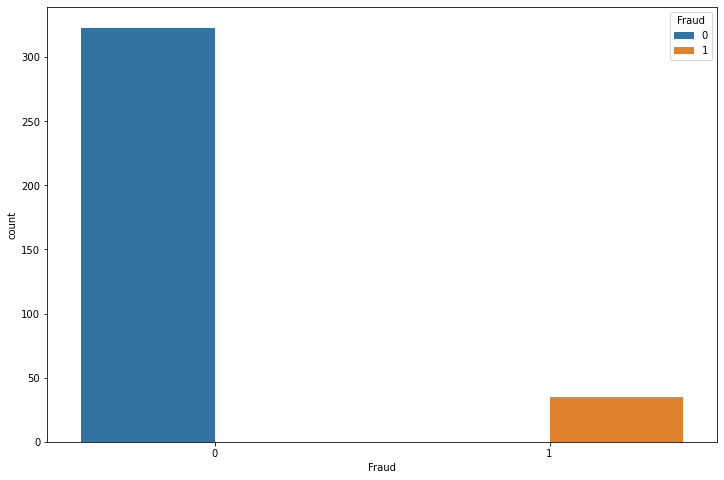

In [28]:
for i in data.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=str(i),data=data,hue='Fraud')
    

In [29]:
# lets build a simple classification model without doing any feature extration,
data.columns

Index(['Region', 'State', 'Area', 'City', 'Consumer_profile',
       'Product_category', 'Product_type', 'AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Service_Centre', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose', 'Fraud'],
      dtype='object')

In [30]:
# first we will drop the features which are not required, i.e. region, city, profile etc.
x=data[['AC_1001_Issue', 'AC_1002_Issue',
       'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue',
       'Claim_Value', 'Product_Age', 'Purchased_from',
       'Call_details', 'Purpose']]

In [31]:
x.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Purchased_from,Call_details,Purpose
0,0,0,0,1,2,0,15000.0,60,Manufacturer,0.5,Complaint
1,1,1,0,0,0,0,20000.0,10,Dealer,1.0,Complaint
2,0,1,2,0,0,0,18000.0,10,Dealer,1.4,Claim
3,0,0,0,1,1,0,12000.0,20,Manufacturer,2.0,Complaint
4,0,0,0,0,1,2,25000.0,6,Dealer,1.3,Claim


In [32]:
# lets convert the catagorical features into numerical 
X=pd.get_dummies(x,drop_first=True)

In [33]:
X.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
0,0,0,0,1,2,0,15000.0,60,0.5,0,1,1,0
1,1,1,0,0,0,0,20000.0,10,1.0,0,0,1,0
2,0,1,2,0,0,0,18000.0,10,1.4,0,0,0,0
3,0,0,0,1,1,0,12000.0,20,2.0,0,1,1,0
4,0,0,0,0,1,2,25000.0,6,1.3,0,0,0,0


In [34]:
y=data['Fraud']

In [35]:
# as we can see the variation in the features values, it is required to do normalization of the values
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()

In [37]:
X_sc= sc.fit_transform(X)

In [38]:
X_new=pd.DataFrame(data=X_sc,columns=X.columns)

In [39]:
X_new.head()

,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Product_Age,Call_details,Purchased_from_Internet,Purchased_from_Manufacturer,Purpose_Complaint,Purpose_Other
0,-0.528826,-0.536541,-0.385596,1.002949,2.309777,-0.528239,0.249492,-0.546880,-0.990343,-0.553687,1.285244,1.205012,-0.359635
1,1.062096,1.091270,-0.385596,-0.607166,-0.675422,-0.528239,0.664555,-0.739656,-0.947028,-0.553687,-0.778062,1.205012,-0.359635
2,-0.528826,1.091270,3.396416,-0.607166,-0.675422,-0.528239,0.498530,-0.739656,-0.912376,-0.553687,-0.778062,-0.829867,-0.359635
3,-0.528826,-0.536541,-0.385596,1.002949,0.817178,-0.528239,0.000454,-0.701101,-0.860398,-0.553687,1.285244,1.205012,-0.359635
4,-0.528826,-0.536541,-0.385596,-0.607166,0.817178,3.411541,1.079618,-0.755078,-0.921039,-0.553687,-0.778062,-0.829867,-0.359635


In [40]:
# lets devide our data set into train and test sets

In [41]:
from sklearn.model_selection import train_test_split

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [42]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,train_size=0.7,random_state=100)

In [43]:
from sklearn.ensemble import RandomForestClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [44]:
rfc=RandomForestClassifier(n_estimators=100)

In [45]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [46]:
y_pred_rfc=rfc.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [53]:
confusion_matrix(y_test,y_pred_rfc)

array([[94,  5],
       [ 9,  0]])

In [54]:
accuracy_score(y_test,y_pred_rfc)

0.8703703703703703

In [55]:
print(classification_report(y_test,y_pred_rfc,output_dict=False))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.00      0.00      0.00         9

    accuracy                           0.87       108
   macro avg       0.46      0.47      0.47       108
weighted avg       0.84      0.87      0.85       108



In [56]:
roc_auc_score(y_test,y_pred_rfc)

0.47474747474747475

In [57]:
# area under the ROC is less than 0.5 which indicated that our model is performing worst.
# Precision and recall for class '0' is very good but at the same time precision and recall of class'1' is zero,
# it is required to balance the dataset.